# Location of Field Research Facility and Bathymetry DEM during DUNEX
written by: EJ Rainville

Leads to fig01 in the paper

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import pandas as pd
import contextily
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# %matplotlib widget

## Create map of North Carolina and Show Bathymetry DEM during DUNEX

/var/folders/tj/6lfp4z413tg03k2fzx57134c0000gn/T/ipykernel_7605/2891717613.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_map.set_xticklabels(ax_map.get_xticks(), rotation = 45)


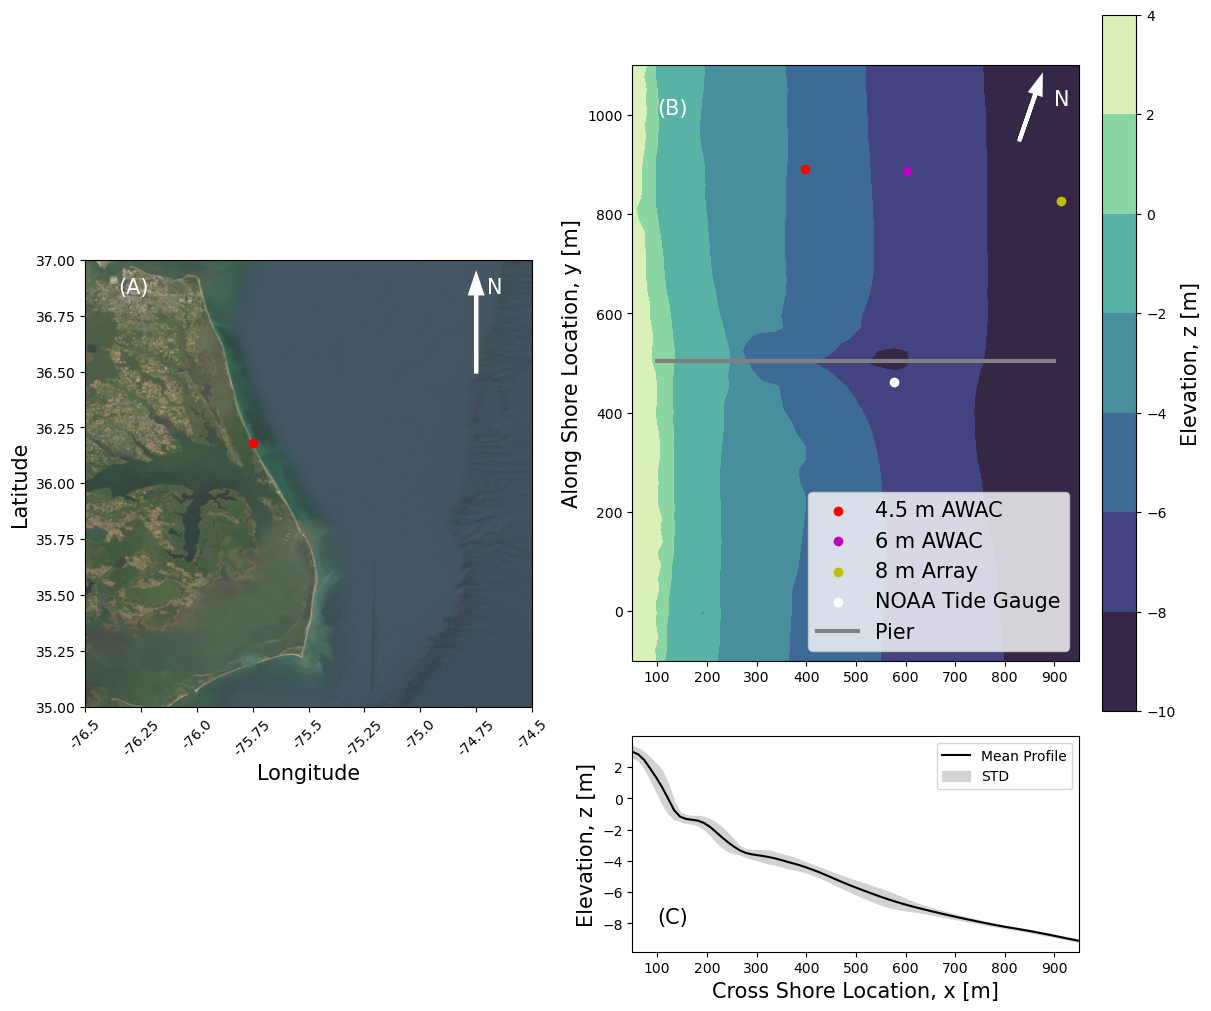

In [11]:
fig = plt.figure(constrained_layout=True,figsize=(12,10))
gs = fig.add_gridspec(4, 2)

# Create pandas dataframe and simple geometry 
FRF_lat = 36.182445
FRF_lon = -75.750384
df = pd.DataFrame()
geometry = [Point(FRF_lon, FRF_lat),Point(-100, FRF_lat),Point(FRF_lon, 50)]       
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='epsg:4326')

########
# Panel A - Plot the map of North Carolina
ax_map = fig.add_subplot(gs[:, 0])
gdf.plot(ax=ax_map, color='r')
ax_map.set_xlim(-76.5,-74.5)
ax_map.set_ylim(35,37)
contextily.add_basemap(ax_map,
                       source ="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}.jpg",
                       crs=gdf.crs.to_string(), alpha=0.8)
ax_map.set_xlabel('Longitude', fontsize=15)
ax_map.set_ylabel('Latitude', fontsize=15)
ax_map.annotate('(A)',(-76.35, 36.85), color='w', fontsize=15)
ax_map.arrow(-74.75,36.5,0,0.35, linewidth=3, head_width=0.05, color='w')
ax_map.annotate('N',(-74.7, 36.85), color='w', fontsize=15)
ax_map.set_xticklabels(ax_map.get_xticks(), rotation = 45)

########
# Panel B - Bathy at FRF
ax_bathy = fig.add_subplot(gs[:3, 1])
bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_url)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations
noaa_tide_location = [576.1, 460.93] # Location of the NOAA tide gauge

# Plot the Bathymetry 
im = ax_bathy.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
ax_bathy.set_ylabel('Along Shore Location, y [m]', fontsize=15)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Elevation, z [m]', fontsize=15)

# Plot the Location of the 4.5 m AWAC, 6 m AWAC and 8 m Array and Pier
ax_bathy.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
ax_bathy.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax_bathy.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax_bathy.scatter(noaa_tide_location[0], noaa_tide_location[1], color='w', label='NOAA Tide Gauge')
ax_bathy.plot([100, 900], [505, 505], linewidth=3, color='gray', label='Pier')
ax_bathy.axis('scaled')
ax_bathy.legend(loc='lower right', fontsize=15)
ax_bathy.annotate('(B)',(100, 1000), color='w', fontsize=15)
ax_bathy.arrow(830,950,100*np.cos(np.deg2rad(90-19)),100*np.sin(np.deg2rad(90-19)), linewidth=3, head_width=20, color='w')
ax_bathy.annotate('N',(900, 1020), color='w', fontsize=15)

########
# Panel C - Profile 
ax_profile = fig.add_subplot(gs[3, 1])
ax_profile.sharex(ax_bathy)
ax_profile.plot(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0), color='k', label='Mean Profile')
ax_profile.fill_between(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0)-np.abs(np.nanstd(bathy, axis=0)),  np.nanmean(bathy, axis=0)+np.abs(np.nanstd(bathy, axis=0)), color='lightgray', label='STD')
ax_profile.legend()
ax_profile.set_xlabel('Cross Shore Location, x [m]', fontsize=15)
ax_profile.set_ylabel('Elevation, z [m]', fontsize=15)
ax_profile.annotate('(C)',(100, -8), color='k', fontsize=15)

# Save the Figure
fig.savefig('./Figures/fig01.png', format='png', dpi=300)

/var/folders/tj/6lfp4z413tg03k2fzx57134c0000gn/T/ipykernel_7605/1998778694.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_map.set_xticklabels(ax_map.get_xticks(), rotation = 45)


[Text(-76.0, 0, '-76.0'),
 Text(-75.8, 0, '-75.8'),
 Text(-75.6, 0, '-75.6'),
 Text(-75.4, 0, '-75.4'),
 Text(-75.2, 0, '-75.2'),
 Text(-75.0, 0, '-75.0'),
 Text(-74.8, 0, '-74.8'),
 Text(-74.6, 0, '-74.6'),
 Text(-74.4, 0, '-74.4')]

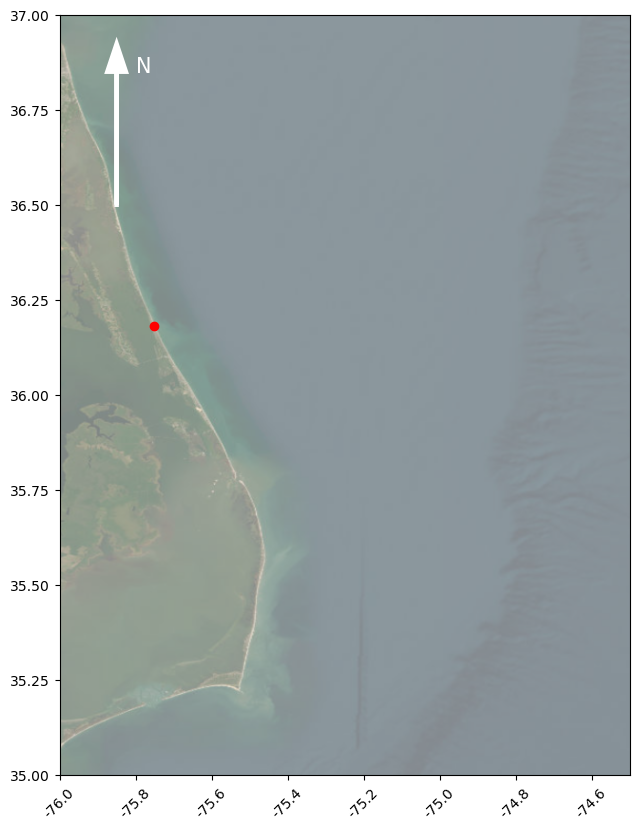

In [24]:
fig = plt.figure(constrained_layout=True,figsize=(12,10))
gs = fig.add_gridspec(4, 2)

# Create pandas dataframe and simple geometry 
FRF_lat = 36.182445
FRF_lon = -75.750384
df = pd.DataFrame()
geometry = [Point(FRF_lon, FRF_lat),Point(-100, FRF_lat),Point(FRF_lon, 50)]       
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='epsg:4326')

########
# Panel A - Plot the map of North Carolina
ax_map = fig.add_subplot(gs[:, 0])
gdf.plot(ax=ax_map, color='r')
ax_map.set_xlim(-76.0,-74.5)
ax_map.set_ylim(35,37)
contextily.add_basemap(ax_map,
                       source ="https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}.jpg",
                       crs=gdf.crs.to_string(), alpha=0.5)
ax_map.arrow(-75.85,36.5,0,0.35, linewidth=3, head_width=0.05, color='w')
ax_map.annotate('N',(-75.8, 36.85), color='w', fontsize=15)
ax_map.set_xticklabels(ax_map.get_xticks(), rotation = 45)

Text(900, 1020, 'N')

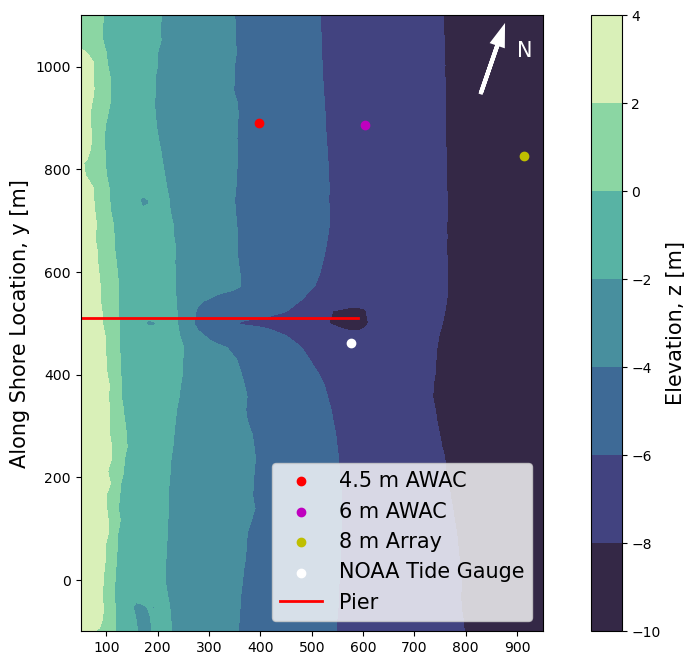

In [16]:
# Panel B - Bathy at FRF
fig, ax_bathy = plt.subplots(figsize=(8,8))
bathy_url = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/geomorphology/DEMs/surveyDEM/data/FRF_geomorphology_DEMs_surveyDEM_20210928.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]

# Fixed Instrument Locations
awac4p5m_location = [397.35, 890.98] # Converted from lat lon locations published on FRF data portal
awac6m_location = [603.12, 886.68]   # Converted from lat lon locations published on FRF data portal
array8m_location = [914.05, 826.08]  # Nominal location based on published data even though this array has multiple locations
noaa_tide_location = [576.1, 460.93] # Location of the NOAA tide gauge

# Plot the Bathymetry 
im = ax_bathy.contourf(xFRF_grid, yFRF_grid, bathy, cmap=cmocean.cm.deep_r)
ax_bathy.set_ylabel('Along Shore Location, y [m]', fontsize=15)
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Elevation, z [m]', fontsize=15)

# Plot the Location of the 4.5 m AWAC, 6 m AWAC and 8 m Array and Pier
ax_bathy.scatter(awac4p5m_location[0],awac4p5m_location[1], color='r', label='4.5 m AWAC')
ax_bathy.scatter(awac6m_location[0], awac6m_location[1], color='m', label='6 m AWAC')
ax_bathy.scatter(array8m_location[0], array8m_location[1], color='y', label='8 m Array')
ax_bathy.scatter(noaa_tide_location[0], noaa_tide_location[1], color='w', label='NOAA Tide Gauge')
ax_bathy.plot([50,591],[510,510], linewidth=2, color='r', label='Pier')
ax_bathy.axis('scaled')
ax_bathy.legend(loc='lower right', fontsize=15)
# ax_bathy.annotate('(B)',(100, 1000), color='w', fontsize=15)
ax_bathy.arrow(830,950,100*np.cos(np.deg2rad(90-19)),100*np.sin(np.deg2rad(90-19)), linewidth=3, head_width=20, color='w')
ax_bathy.annotate('N',(900, 1020), color='w', fontsize=15)

Text(0, 0.5, 'Elevation, z [m]')

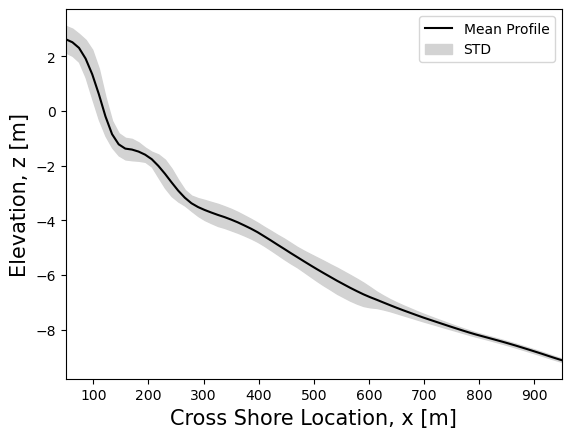

In [21]:
# Panel C - Profile 
fig, ax_profile = plt.subplots()
ax_profile.sharex(ax_bathy)
ax_profile.plot(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0), color='k', label='Mean Profile')
ax_profile.fill_between(bathy_dataset['xFRF'][:], np.nanmean(bathy, axis=0)-np.abs(np.nanstd(bathy, axis=0)),
                        np.nanmean(bathy, axis=0)+np.abs(np.nanstd(bathy, axis=0)), color='lightgray', label='STD')
ax_profile.legend()
ax_profile.set_xlabel('Cross Shore Location, x [m]', fontsize=15)
ax_profile.set_ylabel('Elevation, z [m]', fontsize=15)
# ax_profile.annotate('(C)',(100, -8), color='k', fontsize=15)